Confusion Matrix : 
 [[18  1  0]
 [ 0 19  2]
 [ 0  0 14]]


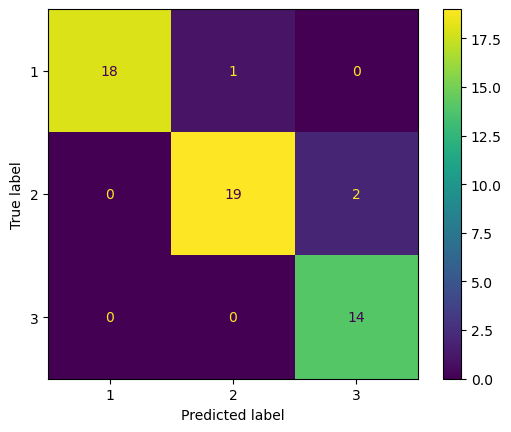

              precision    recall  f1-score   support

     Class 1       1.00      0.95      0.97        19
     Class 2       0.95      0.90      0.93        21
     Class 3       0.88      1.00      0.93        14

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



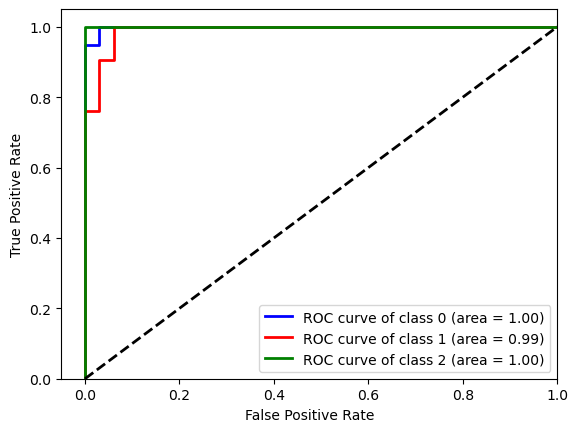

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import classification_report


# Load dataset file
dataset = pd.read_csv('/Users/furqaankhan/Desktop/wine.data', sep = ',')

# Split the dataset into train and test sets
training_set, test_set = train_test_split(dataset, test_size = 0.3, train_size = 0.7, random_state = 42)

# Separate the Label from the Features
training_data = training_set.iloc[:,1:]
training_target = training_set.iloc[:,0]

test_data = test_set.iloc[:,1:]
test_target = test_set.iloc[:,0]


# Run Naive Bayes classifier algorithm
clf_gnb = GaussianNB()

# Fit
clf_gnb.fit(training_data, training_target)

# Predict
preds_gnb = clf_gnb.predict(test_data)

# Confusion matrix
print('Confusion Matrix : \n', confusion_matrix(test_target, preds_gnb))
ConfusionMatrixDisplay.from_predictions(test_target, preds_gnb)
plt.show()

# Calculate classification report
target_names = ['Class 1', 'Class 2', 'Class 3']
print(classification_report(test_target, preds_gnb, target_names=target_names))


binary_labels = label_binarize(test_target, classes=[1, 2, 3])
n_classes = binary_labels.shape[1]

score = clf_gnb.fit(training_data, training_target).predict_proba(test_data)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binary_labels[:, i], score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


